In [1]:
import pickle
import pandas as pd
import matplotlib as mpl
from datetime import datetime, timedelta, date, time

In [2]:
df = pd.read_pickle("data/weather.pickle")

In [3]:
df.head(3)

,Temperature,Humidity,Wind Speed,Precip.,cloud,rain,Fair,Fog,Snow,T-Storm,Thunder
datetime,,,,,,,,,,,
2014-01-01 00:00:00,-10.0,84.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 01:00:00,-8.9,84.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,-8.3,84.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.describe()

,Temperature,Humidity,Wind Speed,Precip.,cloud,rain,Fair,Fog,Snow,T-Storm,Thunder
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,9.857169,66.552169,10.173858,0.003653,1.596918,0.100000,0.216096,0.012215,0.021575,0.002283,0.005251
std,12.508246,16.208322,5.206614,0.037111,1.239994,0.436177,0.411604,0.109849,0.145301,0.047730,0.072278
min,-25.600000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.100000,68.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.600000,79.000000,13.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,100.000000,37.000000,1.100000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df['Time'] = df.index.time
df['Day'] = df.index.date
df["Weekday"]= df.index.dayofweek
df["Hour"] = df.index.hour
df["Month"]= df.index.month

In [48]:
df.head(3)

,Temperature,Humidity,Wind Speed,Precip.,cloud,rain,Fair,Fog,Snow,T-Storm,Thunder,Time,Day,Weekday,Hour,Month
datetime,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,14.0,84.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,2014-01-01,2,0,1
2014-01-01 01:00:00,16.0,84.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,01:00:00,2014-01-01,2,1,1
2014-01-01 02:00:00,17.0,84.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,02:00:00,2014-01-01,2,2,1


Text(0.5, 0, 'Hour')

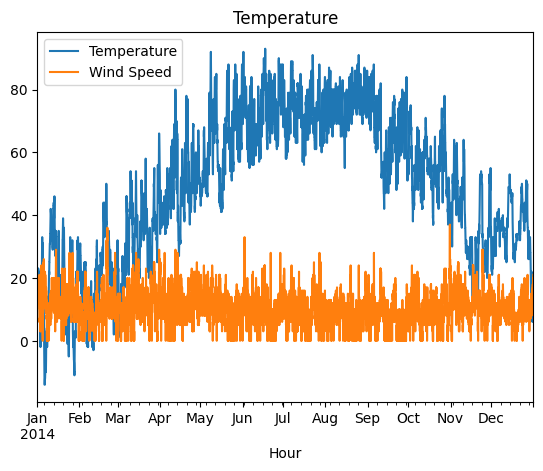

In [64]:
ax = df.plot(y=["Temperature", "Wind Speed"], title ="Temperature", legend=True)
ax.set_xlabel("Hour")

In [78]:
df.groupby(["Month"])["Temperature"].mean()

Month
1     17.288978
2     18.965774
3     32.451613
4     49.820833
5     62.995968
6     72.643056
7     72.720430
8     75.256720
9     66.112500
10    55.028226
11    36.748611
12    34.754032
Name: Temperature, dtype: float64

In [82]:
#df.pivot_table(df, columns=["Temperature"], aggfunc=["sum", "mean"], index="Month")

Text(0, 0.5, 'Mean Temperature')

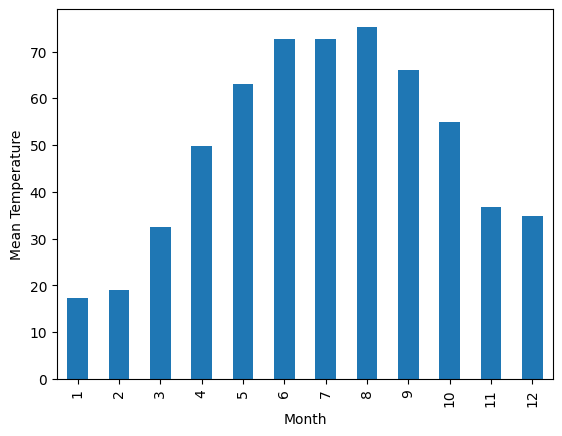

In [81]:
#bikes_by_day = df_LA.pivot_table("bike_id", aggfunc='count', index="Day" )
ax = df.groupby(["Month"])["Temperature"].mean().plot(kind = "bar", legend=False)
ax.set_xlabel("Month")
ax.set_ylabel("Mean Temperature")